<a href="https://colab.research.google.com/github/Nikhil90398/Regression_Models/blob/main/oceanographic_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Context
The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. It includes abundance data on the larvae of over 250 species of fish; larval length frequency data and egg abundance data on key commercial species; and oceanographic and plankton data. The physical, chemical, and biological data collected at regular time and space intervals quickly became valuable for documenting climatic cycles in the California Current and a range of biological responses to them. CalCOFI research drew world attention to the biological response to the dramatic Pacific-warming event in 1957-58 and introduced the term “El Niño” into the scientific literature.

The California Cooperative Oceanic Fisheries Investigations (CalCOFI) are a unique partnership of the California Department of Fish & Wildlife, NOAA Fisheries Service and Scripps Institution of Oceanography. The organization was formed in 1949 to study the ecological aspects of the sardine population collapse off California. Today our focus has shifted to the study of the marine environment off the coast of California, the management of its living resources, and monitoring the indicators of El Nino and climate change. CalCOFI conducts quarterly cruises off southern & central California, collecting a suite of hydrographic and biological data on station and underway. Data collected at depths down to 500 m include: temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton biomass, and zooplankton biodiversity.

# Question
CalCOFI data: Over 60 years of oceanographic data: Is there a relationship between water salinity & water temperature? Can you predict the water temperature based on salinity?

#Step 1 - Download and Explore the Data
The dataset is available as a ZIP file at the following url:

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/sohier/calcofi'

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od

In [ ]:
od.download(dataset_url)

Skipping, found downloaded files in "./calcofi" (use force=True to force download)


In [ ]:
import os
data_dir='/content/calcofi'
os.listdir(data_dir)

['bottle.csv', 'cast.csv']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
path= data_dir +"/bottle.csv"
bottle=pd.read_csv(path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
bottle.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#The following settings will improve the default style and font sizes for our charts
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

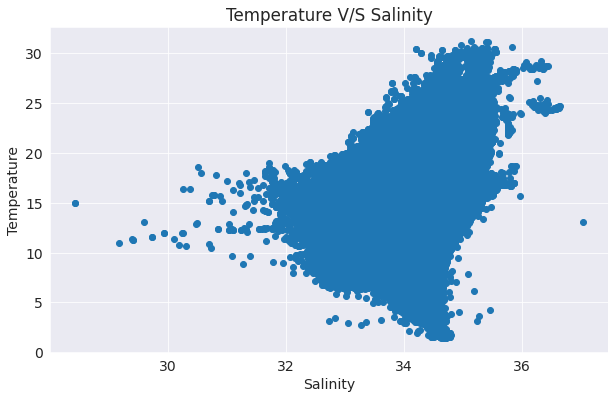

In [ ]:
plt.scatter(bottle.Salnty,bottle.T_degC)
plt.ylabel("Temperature")
plt.xlabel('Salinity')
plt.title("Temperature V/S Salinity")
plt.show();

#Step 2 - Prepare the Dataset for Training

In [ ]:
bottle['Salnty'] = bottle['Salnty'].fillna(bottle.Salnty.median())
bottle['T_degC'] = bottle['T_degC'].fillna(bottle.T_degC.median())

In [ ]:
inputs=bottle[["Salnty"]]
targets=bottle.T_degC

##Scale Numerical Values

In [ ]:
from sklearn.preprocessing import StandardScaler
# Create the scaler
scaler = StandardScaler()
# Fit the scaler to the numeric columns
scaler.fit(inputs)
# Transform and replace the numeric columns
inputs = scaler.transform(inputs)

##Training and Validation Set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_inputs, test_inputs, train_targets, test_targets = train_test_split(inputs,targets,test_size=0.25,random_state=42)

#Step 3 - Train a Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
# Create the model
model=LinearRegression()
# Fit the model using inputs and targets
model.fit(train_inputs,train_targets)

LinearRegression()

#Step 4 - Make Predictions and Evaluate Your Mode

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
train_preds =model.predict(train_inputs)

In [ ]:
train_rmse = np.sqrt(mean_squared_error(train_targets,train_preds))
print('The RMSE loss for the training set is  {}.'.format(train_rmse))

The RMSE loss for the training set is  3.6759919099588685.


In [ ]:
print(r2_score(train_targets,train_preds))

0.24048545902989926


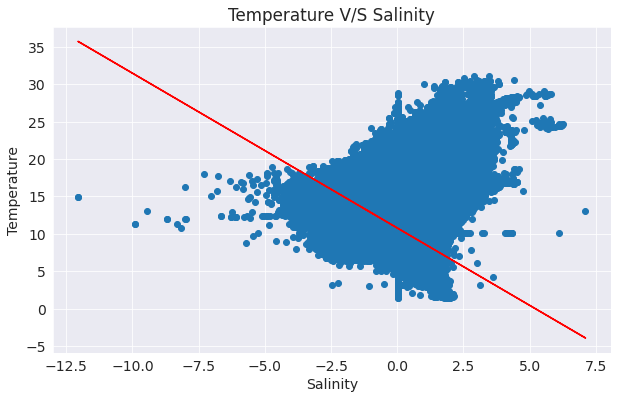

In [ ]:
plt.plot(train_inputs,train_preds,c="r")
plt.scatter(train_inputs,train_targets)
plt.ylabel("Temperature")
plt.xlabel('Salinity')
plt.title("Temperature V/S Salinity")
plt.show();